In [1]:
import networkx as nx
import pickle
import random
import scipy
from scipy.sparse import tril, find
import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import igraph
from django.core.management import call_command

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.tasks import *

from django.db.models import Count, Sum

qid= 7360
q = Query.objects.get(pk=qid)

sample = 0

# You need to call the management command to generate the network, if this is a new query
regenerate_matrix = True
if regenerate_matrix:
    call_command('citation_matrix', qid)
    call_command('bib_matrix', qid, 0, "/home/galm/projects/energy-demand/citation_data")

Cmat = scipy.sparse.load_npz(f'citation_data/bibCouple_q_{qid}_{sample}.npz')

with open(f"citation_data/docnet_dict_q_{qid}_{sample}.pickle", "rb") as f:
    m_dict = pickle.load(f)
with open(f"citation_data/docnet_revdict_q_{qid}_{sample}.pickle", "rb") as f:
    rev_m_dict = pickle.load(f)
    
# We have a lot of connections! to make this more tractable, I ignore edges with fewer than 3 
# references in common
Cmat.data *= Cmat.data>=3
Cmat.eliminate_zeros()

Cmat



5051
0
1000
2000
!!ERROR saving!!
Kuehn, M., Hummel, T., Bende, J., in:, Proc. 21st Int. Tech. Conf. Th Enhanc. Saf. Veh. Conf. (EVS), Stuttgart, Ger., 2009, 1-10; Storie, V.J., No. TRRL Lab Rept. 761. 1977; Treat, J.R., Tumbas, N.S., McDonald, S.T., Shinar, D., Hume, R.D., No. DOTHS034353579TAC (5) Final Rpt. 1979; Endsley, M.R., Kiris, E.O., Hum. Factors J. Hum. Factors Ergon. Soc. 37 (1995) 381-394; Kaber, D.B., Endsley, M.R., Process Saf. Prog. 16 (1997) 126-131; Parasuraman, R., Riley, V., Hum. Factors J. Hum. Factors Ergon. Soc. 39 (1997) 230-253; Hancock, P.A., Jagacinski, R.J., Parasuraman, R., Wickens, C.D., Wilson, G.F., Kaber, D.B., Ergon. Des. Q. Hum. Factors Appl. 21 (2013) 9-14; J.C.F. De Winter, R. Happee, M.H. Martens, N.A. Stanton, Transp. Res. Part F Traffic Psychol. Behav. 27 (2014) 196-217; Stanton, N.A., Young, M.S., Ergonomics 41 (1998) 1014-1028; Merat, N., Lee, J.D., Hum. Factors J. Hum. Factors Ergon. Soc. 54 (2012) 681-686; Kyriakidis, M., Happee, R., http://s

<65102x65102 sparse matrix of type '<class 'numpy.int64'>'
	with 2293276 stored elements in Compressed Sparse Row format>

In [2]:
pids = [148, 182, 147, 186]

queries = Query.objects.filter(
    text="[GENERATED TYPE 1]",
    project__in=pids
)
for q in queries:
    print(q)
    call_command('citation_matrix', q.id)
    call_command('bib_matrix', q.id, 0, "/home/galm/projects/energy-demand/citation_data")

Literature survey demand-side mitigation solutions - all docs
782
0
!!ERROR saving!!
Kuehn, M., Hummel, T., Bende, J., in:, Proc. 21st Int. Tech. Conf. Th Enhanc. Saf. Veh. Conf. (EVS), Stuttgart, Ger., 2009, 1-10; Storie, V.J., No. TRRL Lab Rept. 761. 1977; Treat, J.R., Tumbas, N.S., McDonald, S.T., Shinar, D., Hume, R.D., No. DOTHS034353579TAC (5) Final Rpt. 1979; Endsley, M.R., Kiris, E.O., Hum. Factors J. Hum. Factors Ergon. Soc. 37 (1995) 381-394; Kaber, D.B., Endsley, M.R., Process Saf. Prog. 16 (1997) 126-131; Parasuraman, R., Riley, V., Hum. Factors J. Hum. Factors Ergon. Soc. 39 (1997) 230-253; Hancock, P.A., Jagacinski, R.J., Parasuraman, R., Wickens, C.D., Wilson, G.F., Kaber, D.B., Ergon. Des. Q. Hum. Factors Appl. 21 (2013) 9-14; J.C.F. De Winter, R. Happee, M.H. Martens, N.A. Stanton, Transp. Res. Part F Traffic Psychol. Behav. 27 (2014) 196-217; Stanton, N.A., Young, M.S., Ergonomics 41 (1998) 1014-1028; Merat, N., Lee, J.D., Hum. Factors J. Hum. Factors Ergon. Soc. 54 (

1000
2976623
ROWIDS
colids
data
matrix
transpose
multiply
XX Queries - all docs
16588
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
2599507
ROWIDS
colids
data
matrix
transpose
multiply
Energy demand all - all docs
263
0
!!ERROR saving!!
Kuehn, M., Hummel, T., Bende, J., in:, Proc. 21st Int. Tech. Conf. Th Enhanc. Saf. Veh. Conf. (EVS), Stuttgart, Ger., 2009, 1-10; Storie, V.J., No. TRRL Lab Rept. 761. 1977; Treat, J.R., Tumbas, N.S., McDonald, S.T., Shinar, D., Hume, R.D., No. DOTHS034353579TAC (5) Final Rpt. 1979; Endsley, M.R., Kiris, E.O., Hum. Factors J. Hum. Factors Ergon. Soc. 37 (1995) 381-394; Kaber, D.B., Endsley, M.R., Process Saf. Prog. 16 (1997) 126-131; Parasuraman, R., Riley, V., Hum. Factors J. Hum. Factors Ergon. Soc. 39 (1997) 230-253; Hancock, P.A., Jagacinski, R.J., Parasuraman, R., Wickens, C.D., Wilson, G.F., Kaber, D.B., Ergon. Des. Q. Hum. Factors Appl. 21 (2013) 9-14; J.C.F. De Winter, R. Happee, M.H. Martens, N.A. Stan

In [3]:


def check_cites(bc,rev_m_dict, i=0):
    d1 = Doc.objects.get(pk=rev_m_dict[bc[0][i]])
    d2 = Doc.objects.get(pk=rev_m_dict[bc[1][i]])
    print(bc[2][i])
    return set(d2.wosarticle.cr) & set(d1.wosarticle.cr)

bc = find(tril(Cmat,k=-1))

check_cites(bc, rev_m_dict, 1)



3


{'BOVENBERG AL, 1994, AM ECON REV, V84, P1085',
 'Bovenberg AL, 1996, AM ECON REV, V86, P985',
 'Bovenberg AL, 1997, J PUBLIC ECON, V63, P207'}

In [4]:

def read_network(Cmat, rev_m_dict, doc_ids=None):
    g = igraph.Graph()
    g.add_vertices(len(rev_m_dict))
    edges = []
    weights = []
    n1s, n2s, ews = find(tril(Cmat,k=-1))
    for i, n1 in enumerate(n1s):
        if doc_ids:
            if rev_m_dict[n1] not in doc_ids or rev_m_dict[n2s[i]] not in doc_ids:
                continue
        e = (n1,n2s[i])
        edges.append(e)
        weights.append(ews[i])
    g.add_edges(edges)
    g.es["weight"] = weights

    g.vs["doc_id"] = list(rev_m_dict.values())
    return g
    pass



# Set this to the last year we want to include
max_year = 2014
min_year = 2007

# We can filter when we read in the network, if we only want to see an early part of the graph
docs = Doc.objects.filter(pk__in=list(rev_m_dict.values())).filter(PY__lte=max_year,PY__gte=min_year)
doc_ids = docs.values_list('pk',flat=True)
print(docs.count())

g = read_network(Cmat, rev_m_dict, doc_ids)

g = g.clusters().giant()
print(g.summary())







21630
IGRAPH U-W- 13687 147146 -- 
+ attr: doc_id (v), weight (e)


In [5]:
g.vs[1]

igraph.Vertex(<igraph.Graph object at 0x7f107a972408>, 1, {'doc_id': 226})

In [6]:
from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=0.6,

    # Log
    verbose=True
)

positions = forceatlas2.forceatlas2_igraph_layout(
    g, pos=None, iterations=1000, weight_attr="weight"
)

100%|██████████| 1000/1000 [06:03<00:00,  2.75it/s]

BarnesHut Approximation  took  126.04  seconds
Repulsion forces  took  220.70  seconds
Gravitational forces  took  0.69  seconds
Attraction forces  took  5.05  seconds
AdjustSpeedAndApplyForces step  took  4.45  seconds


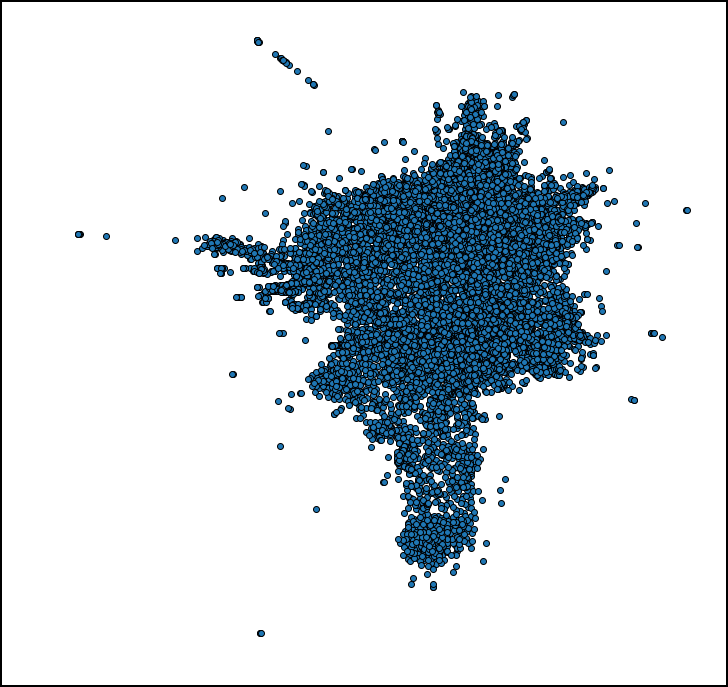

In [7]:
fig, ax = plt.subplots(figsize=(12,12),edgecolor="black",frameon=True,linewidth=4)

x = [x[0] for x in positions]
y = [x[1] for x in positions]
scatter = ax.scatter(x,y,edgecolor="black")

ax.grid(False)
ax.axis("off")

plt.show()

In [8]:
clusters = g.community_fastgreedy(weights="weight")
cl = clusters.as_clustering()

In [9]:
def summarise_cluster(cl, rev_m_dict, qs, c_threshold):
    ids = [g.vs[x]["doc_id"] for x in cl]
    docs = Doc.objects.filter(
        pk__in=ids,
        query__in=qs
    ).values('query__title').annotate(
        n=Count('pk')
    ).order_by('-n')
    df = pd.DataFrame.from_dict(list(docs))
    df['pc'] = round(df['n'] / df['n'].sum(),2)
    t = "\n".join([f"{r['query__title']} - {r['pc']:.0%}" for i,r in df.iterrows() if r['pc']>c_threshold])
    return t
                   
def summarise_category_cluster(cl, project, c_threshold):
    ids = [g.vs[x]["doc_id"] for x in cl]               
    dos = DocOwnership.objects.filter(
        doc__id__in=ids,
        query__project=project,
        relevant=1
    ).values('query__category__name').annotate(
        n = Count('pk')
    ).order_by('-n')
    df = pd.DataFrame.from_dict(list(dos))
    df['pc'] = round(df['n'] / df['n'].sum(),2)
    t = "\n".join([f"{r['query__category__name']} - {r['pc']:.0%}" for i,r in df.iterrows() if r['pc']>c_threshold])
    return t

def summarise_topic_cluster(cl, rev_m_dict, run_id, c_threshold):
    ids = [g.vs[x]["doc_id"] for x in cl]
    docs = Doc.objects.filter(
        pk__in=ids,
        doctopic__run_id=run_id
    ).values('doctopic__topic__title').annotate(
        n=Sum('doctopic__score')
    ).order_by('-n')
    df = pd.DataFrame.from_dict(list(docs))
    df['pc'] = round(df['n'] / df['n'].sum(),2)
    t = "\n".join([f"{r['doctopic__topic__title']} - {r['pc']:.0%}" for i,r in df.iterrows() if r['pc']>c_threshold])
    return t

def draw_network(ax, g, layout, labels, 
                 interactive=False, clusters=None, 
                 qs=None, min_c_size=0,
                 v_padding=50,
                 c_threshold=0.1, run_id=None,
                 rev_m_dict=None, pos="top",
                 category_sum=False,project=None
                ):
    #label_ids = [l['id'] for l in labels]
    ax.grid(False)
    ax.axis('off')
    
    x_offset=0
    if clusters:
        if rev_m_dict:
            pass
            
        for c in clusters:
            x = [x[0] for i,x in enumerate(layout) if i in c]
            y = [x[1] for i,x in enumerate(layout) if i in c] 
            scatter = ax.scatter(x,y,edgecolor="black")
            
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xrange = xlim[1] - xlim[0]
        yrange = ylim[1] - ylim[0]
        x_step = xrange/3
        if pos=="top":
            ha = "center"
            x_offset = x_step/2
        else:
            ha="left"
            x_offset = xrange
        y_offset = 0
        texts = []
        for i,c in enumerate(clusters):
            x = [x[0] for i,x in enumerate(layout) if i in c]
            y = [x[1] for i,x in enumerate(layout) if i in c] 
            scatter = ax.scatter(x,y,edgecolor="black")
            if len(c) < min_c_size:
                continue
            col = scatter.get_facecolors()[0]
            if qs:
                t = summarise_cluster(c,rev_m_dict,qs,c_threshold)
            elif run_id:
                t = summarise_topic_cluster(c,rev_m_dict,run_id,c_threshold)
            elif category_sum:
                t = summarise_category_cluster(c, project, c_threshold)
            else:
                t = ""
            t = f"Cluster {i} - {len(c)} docs\n\n{t}"
            text = ax.text(
                    xlim[0]+x_offset,
                    ylim[1]+y_offset,
                    t,
                    bbox={'facecolor':col, 'alpha':0.5, 'pad':0.4, 'boxstyle': 'round'},
                    va="top",
                    ha=ha
                )
            texts.append(text)
            if pos=="top":
                x_offset+=x_step
                if xlim[0]+x_offset > xlim[1]:
                    fig.canvas.draw()
                    bs = []
                    for t in texts:
                        box = t.get_bbox_patch().get_window_extent()
                        tcbox = ax.transData.inverted().transform(box)
                        bs.append(tcbox[0][1])

                    y_offset+=min(bs)-ylim[1]
                    x_offset = x_step/2
            else:
                fig.canvas.draw()
                box = text.get_bbox_patch().get_window_extent()
                tcbox = ax.transData.inverted().transform(box)
                b = tcbox[0][1]

                y_offset=b-ylim[1] - v_padding           
            
            
            #ax.text(cx, cy, "ASDFASDFASFD")
    else:
        x = [x[0] for x in layout]
        y = [x[1] for x in layout]
        scatter = ax.scatter(x,y,edgecolor="black")


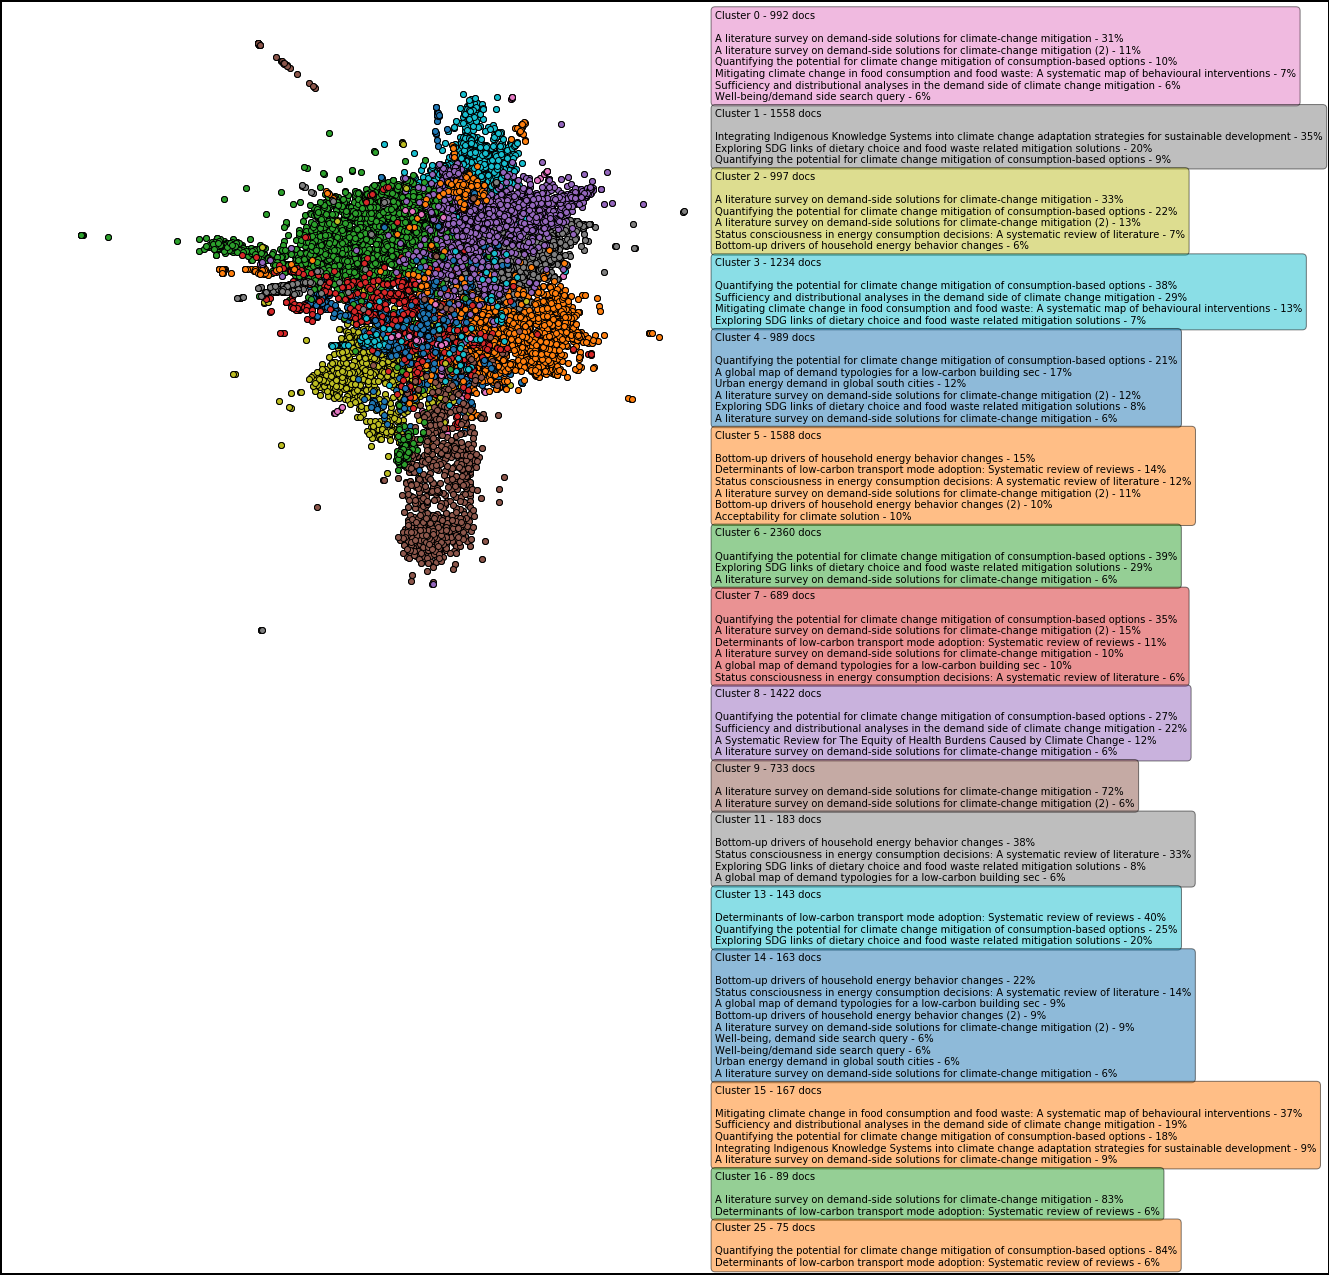

In [10]:
# Here we select the queries we are interested in,
# I'm getting rid of literature survey, because it dominates the results
qs = Query.objects.filter(
    project=147,
).exclude(
    pk__in=[6262,6265,6256,6263,6260,6303,6299,6270, 6254] 
).order_by('r_count')
                   
p2 = Project.objects.get(pk=148)
qs2 = p2.query_set.filter(
    database="WoS",title__iregex="^[a-z]\."
).order_by('title')
all_qs = list(qs)+list(qs2)

fig, ax = plt.subplots(figsize=(12,12),edgecolor="black",frameon=True,linewidth=4)

draw_network(
    ax, g, positions, [], clusters=cl, 
    rev_m_dict=rev_m_dict, qs=all_qs,
    min_c_size=50, # Only label clusters with more than this number of documents
    pos="right",
    c_threshold=0.05
)

plt.savefig(f"plots/citation_networks/bibgraph_couple_forceatlas_fastgreedy_{qid}.svg")
plt.savefig(
    f"plots/citation_networks/bibgraph_couple_forceatlas_fastgreedy_{qid}.png",
    bbox_inches="tight"
)

plt.show()

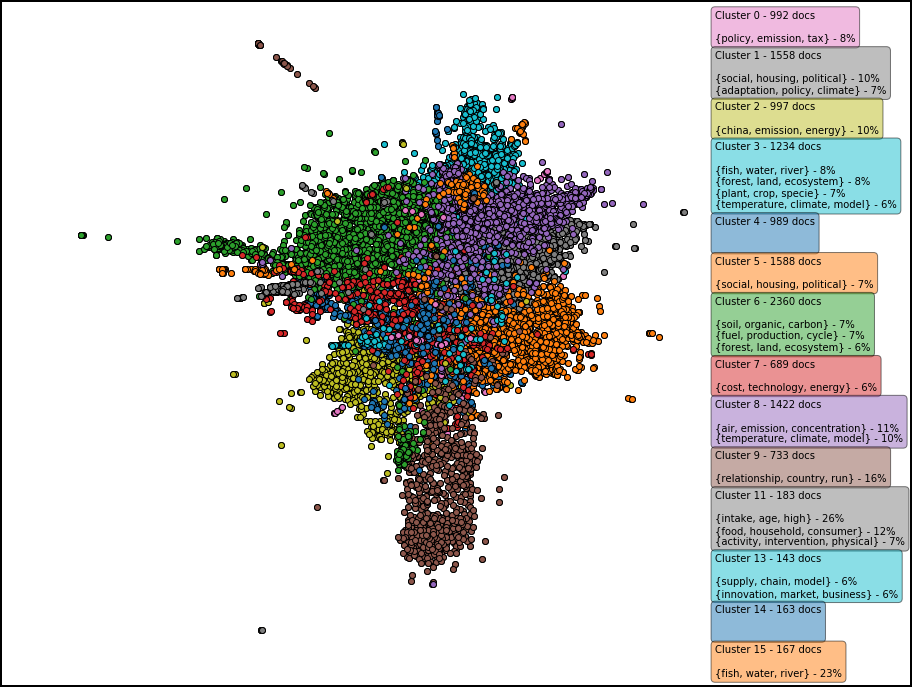

In [11]:
# This time I want the clusters labelled by topic

fig, ax = plt.subplots(figsize=(12,12),edgecolor="black",frameon=True,linewidth=4)

draw_network(
    ax, g, positions, [], clusters=cl, 
    rev_m_dict=rev_m_dict, run_id=2569,
    min_c_size=100, # Only label clusters with more than this number of documents
    pos="right",
    c_threshold=0.05,
    v_padding=50
)

plt.savefig(f"plots/citation_networks/bibgraph_couple_forceatlas_fastgreedy_topics_{qid}.svg")
plt.savefig(
    f"plots/citation_networks/bibgraph_couple_forceatlas_fastgreedy_topics_{qid}.png",
    bbox_inches="tight"
)

plt.show()